In [7]:
%matplotlib inline
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_60_0.6.pkl")
from sklearn.naive_bayes import GaussianNB
from classification import RegionalClassifier
from plotting import plot_clf_polar
from nilearn import plotting as niplt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [8]:
nicknames = pd.read_csv('data/v4-topics-60.txt', delimiter='\t')
nicknames['topic_name'] = nicknames.apply(lambda row: '_'.join([str(row.topic_number)] + row.top_words.split(' ')[0:3]), axis=1)
nicknames = nicknames.sort_values('topic_name')

In [9]:
cognitive_topics = ['memory','categorization','switching','inhibition','priming',
                    'social','fear','emotion','learning','reward',  
                    'decision-making','imagery','spatial','attention','WM',
                    'awareness','language','math','semantics','reading']

disease_topics = ['smoking','eating-disorder','depression','schizopherenia','adhd','autism','Alzheimer-Parkinson','ptsd']

selected_topics = ['memory','categorization','switching','inhibition','priming',
                    'social','fear','emotion','learning','reward',  
                    'decision-making','imagery','spatial','attention','WM',
                    'awareness','language','math','semantics','reading','action','pain',
                  'smoking','Alzheimer-Parkinson','eating-disorder','depression','autism','ptsd','adhd','schizopherenia']

Classifying...
[##########] 100%


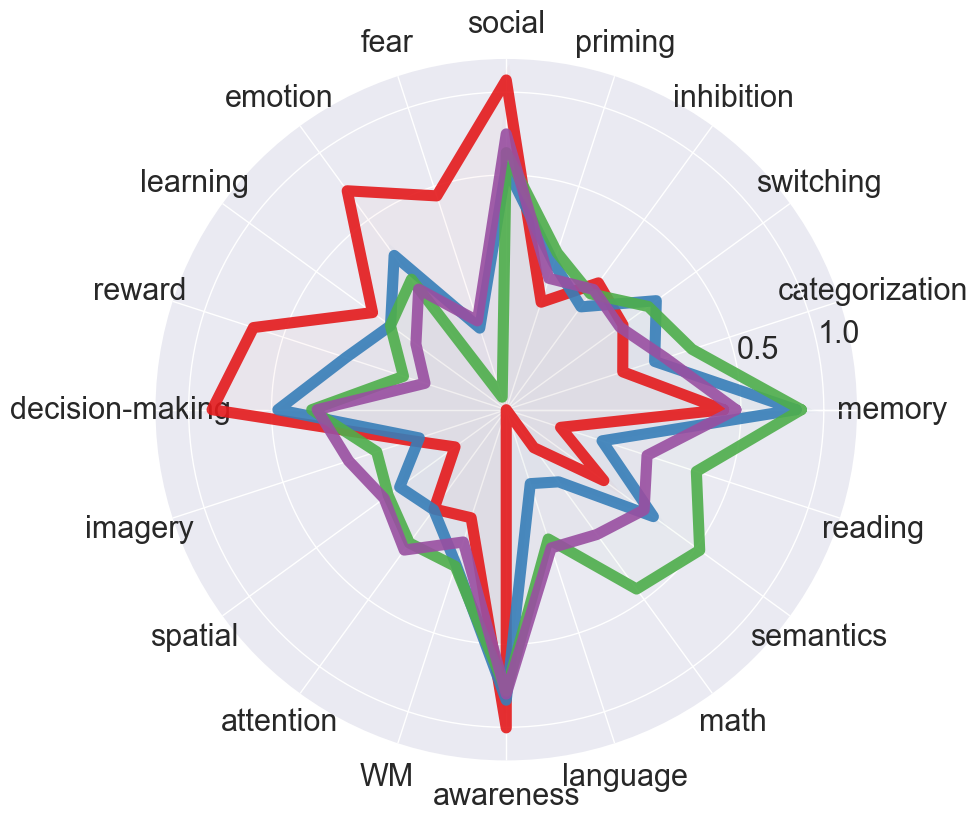

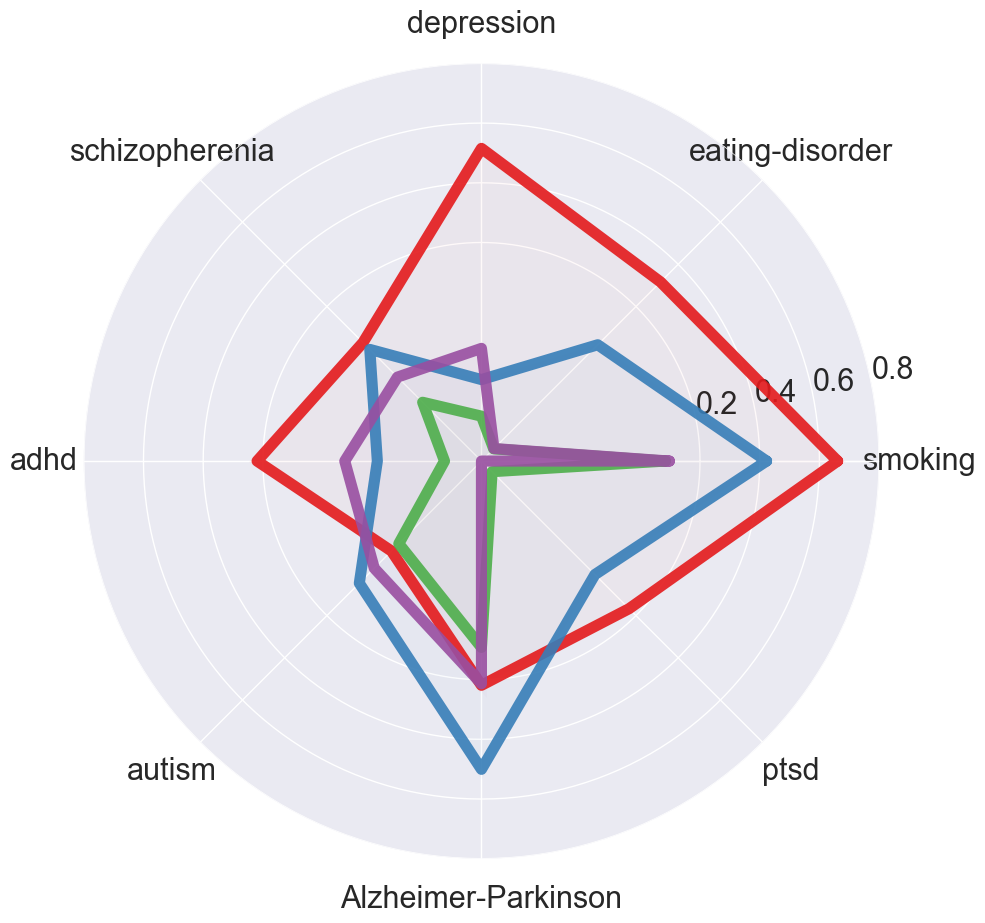

In [11]:
clf = RegionalClassifier(dataset, 'masks/newDMN_4regions.nii.gz', GaussianNB())
clf.classify(scoring=roc_auc_score)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

a, b, cog = plot_clf_polar(formated_importances,labels = cognitive_topics, max_val=1.2,label_size=22)
a, b, dis = plot_clf_polar(formated_importances, labels = disease_topics, max_val=0.8,label_size=22)

cog.savefig('DMN_cog.svg')
dis.savefig('DMN_dis.svg')

Classifying...
[##########] 100%


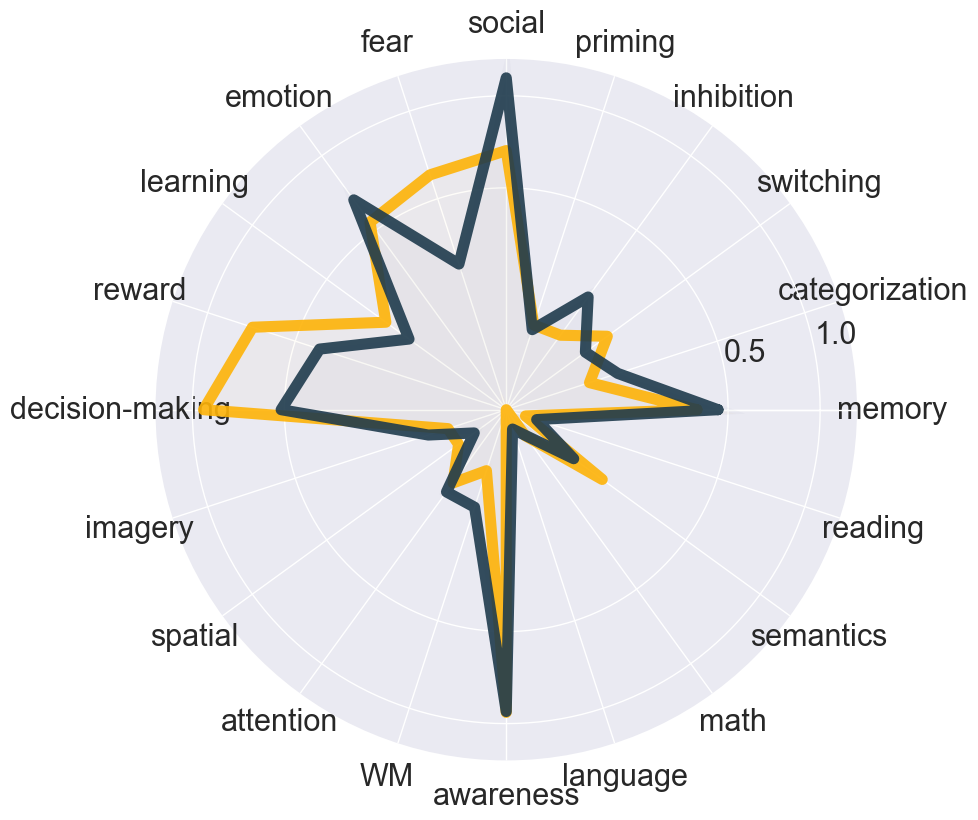

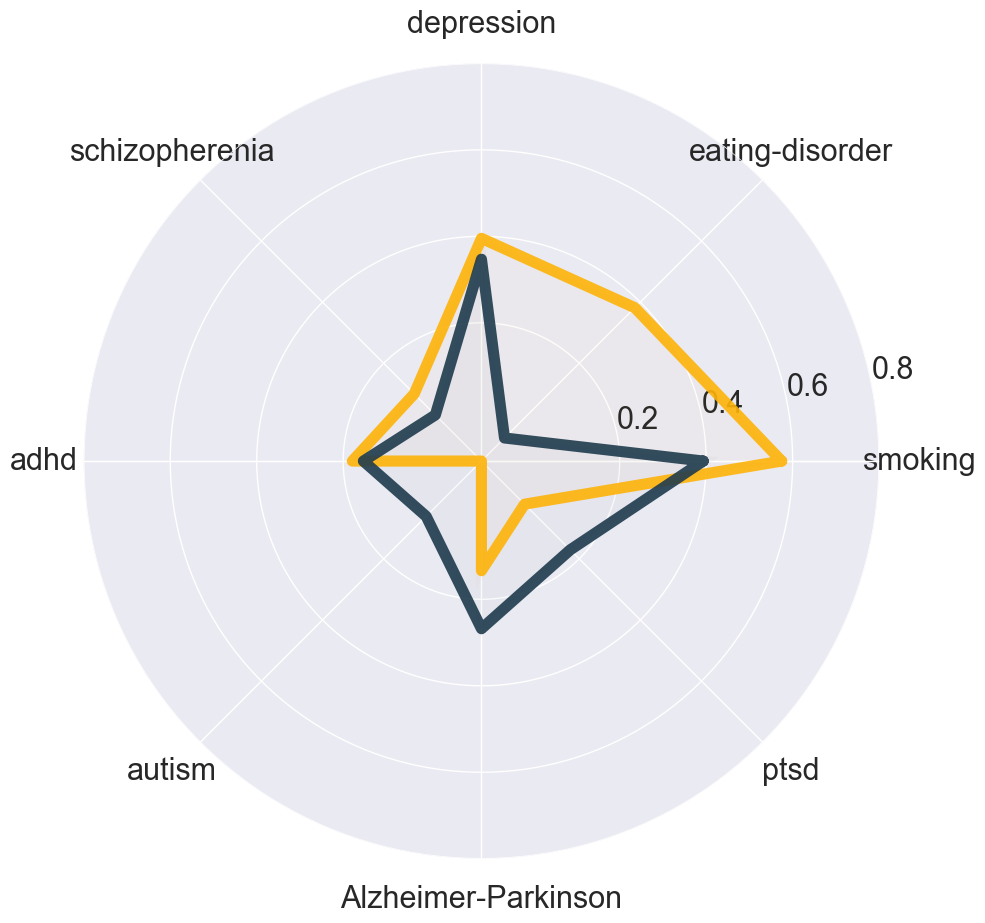

In [15]:
clf = RegionalClassifier(dataset, 'images/MPFC/cluster_labels_k2.nii.gz', GaussianNB())
clf.classify(scoring=roc_auc_score)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

colors = ["amber","dark blue grey"]
colors = sns.xkcd_palette(colors)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

a, b, cog =plot_clf_polar(formated_importances,labels = cognitive_topics, palette = colors, max_val=1.2,label_size=22)
a, b, dis = plot_clf_polar(formated_importances, labels = disease_topics, palette = colors, max_val=0.8,label_size=22)

cog.savefig('MPFC_cog.svg')
dis.savefig('MPFC_dis.svg')

Classifying...
[##########] 100%


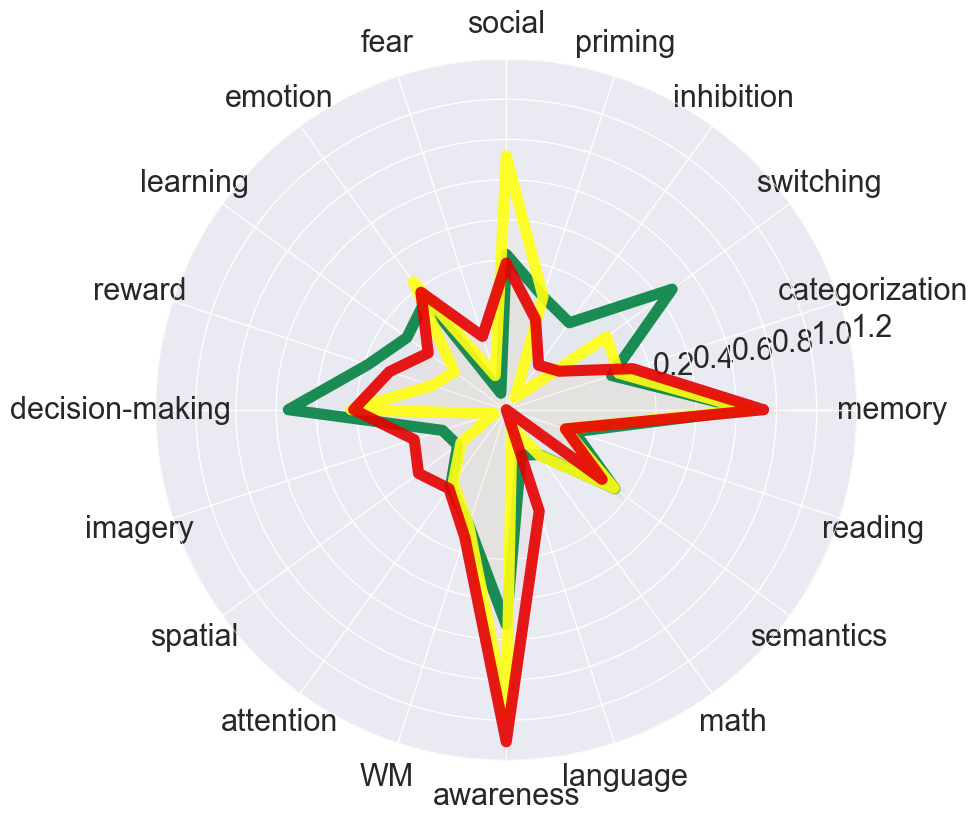

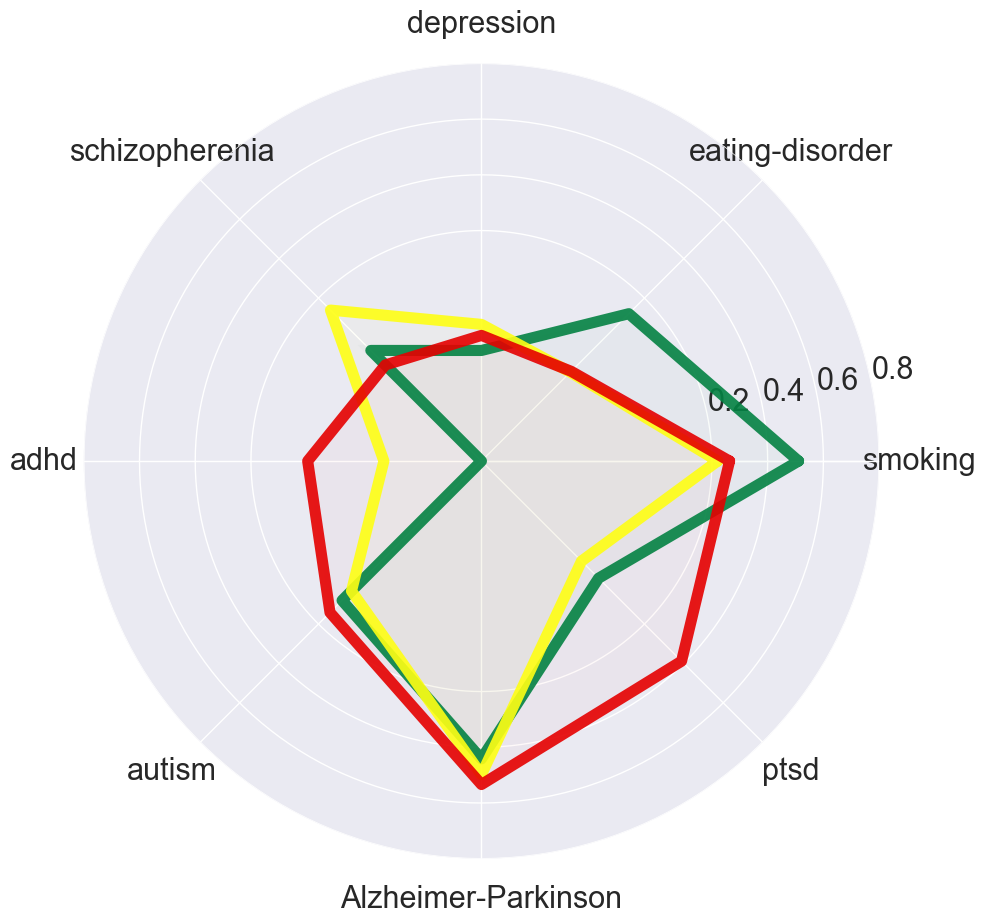

In [16]:
clf = RegionalClassifier(dataset, 'images/PCC/cluster_labels_k3.nii.gz', GaussianNB())
clf.classify(scoring=roc_auc_score)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

colors = ["jungle green","yellow","red"]
colors = sns.xkcd_palette(colors)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

a, b, cog =plot_clf_polar(formated_importances,labels = cognitive_topics, max_val=1.2,palette = colors,label_size=22)
a, b, dis = plot_clf_polar(formated_importances, labels = disease_topics, max_val=0.8,palette = colors,label_size=22)

cog.savefig('PCC_cog.svg')
dis.savefig('PCC_dis.svg')

Classifying...
[##########] 100%


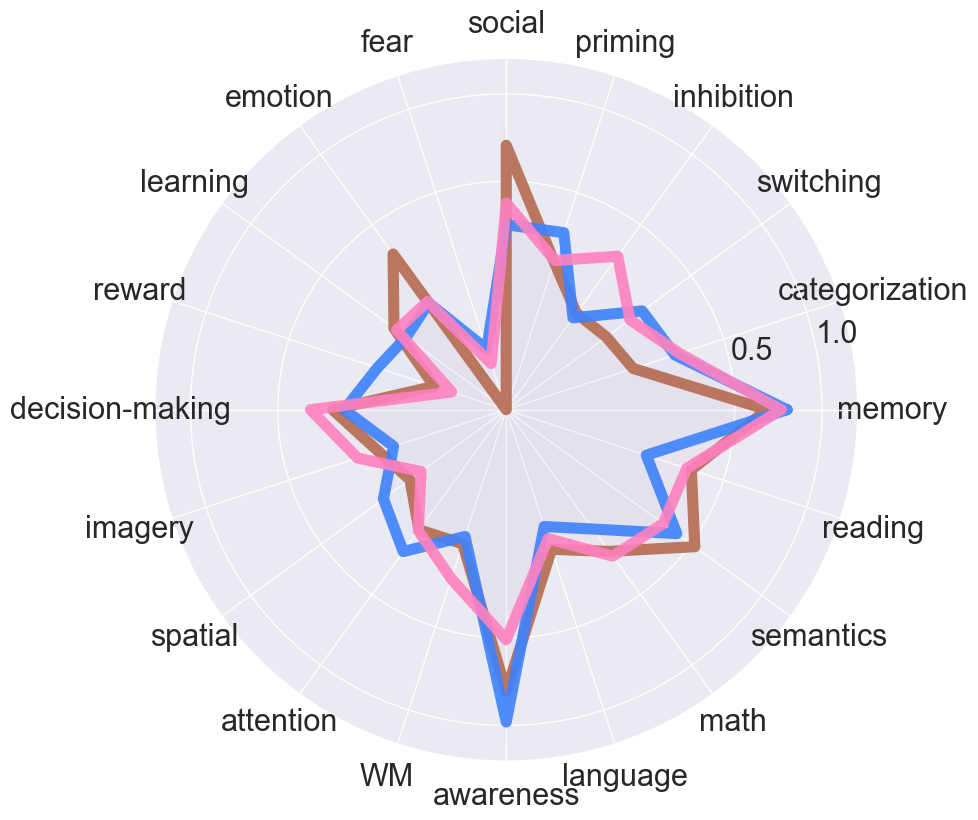

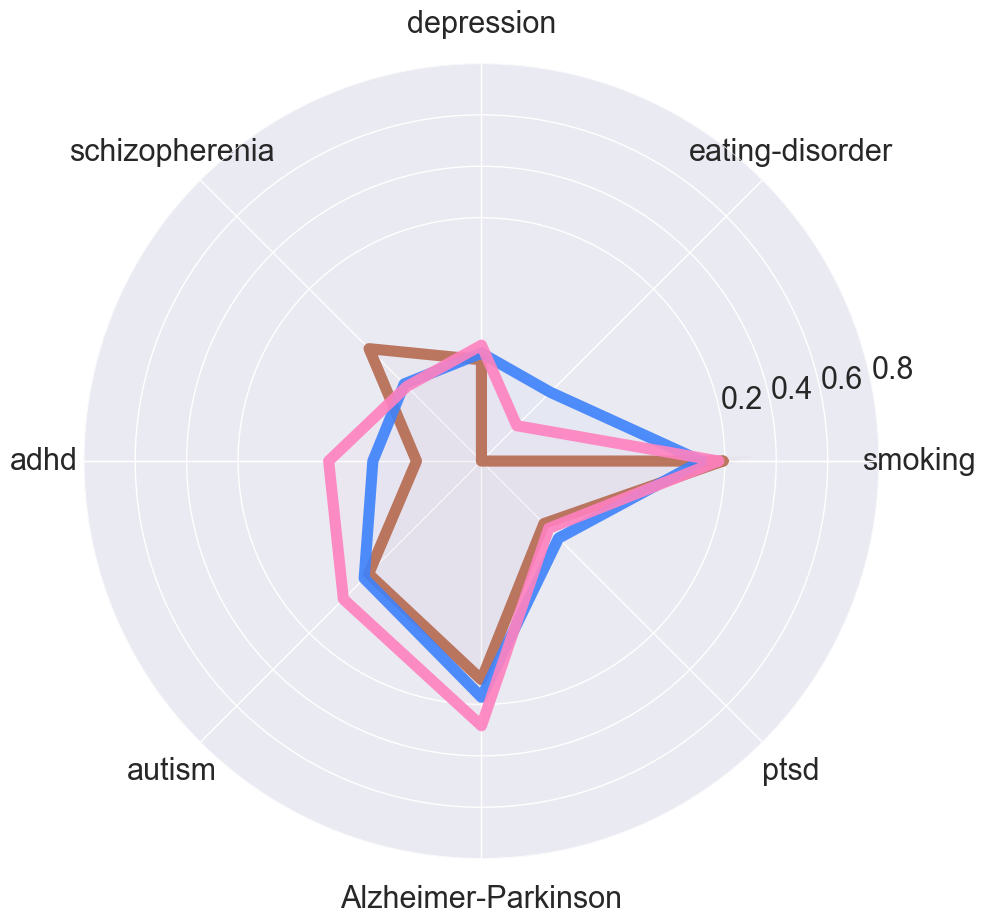

In [17]:
clf = RegionalClassifier(dataset, 'images/lTPJ/cluster_labels_k3.nii.gz', GaussianNB())
clf.classify(scoring=roc_auc_score)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

colors = ["clay","dodger blue","pink"]
colors = sns.xkcd_palette(colors)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

a, b, cog =plot_clf_polar(formated_importances,labels = cognitive_topics, max_val=1.2,palette = colors,label_size=22)
a, b, dis = plot_clf_polar(formated_importances, labels = disease_topics, max_val=0.8,palette = colors,label_size=22)

cog.savefig('lTPJ_cog.svg')
dis.savefig('lTPJ_dis.svg')

Classifying...
[##########] 100%


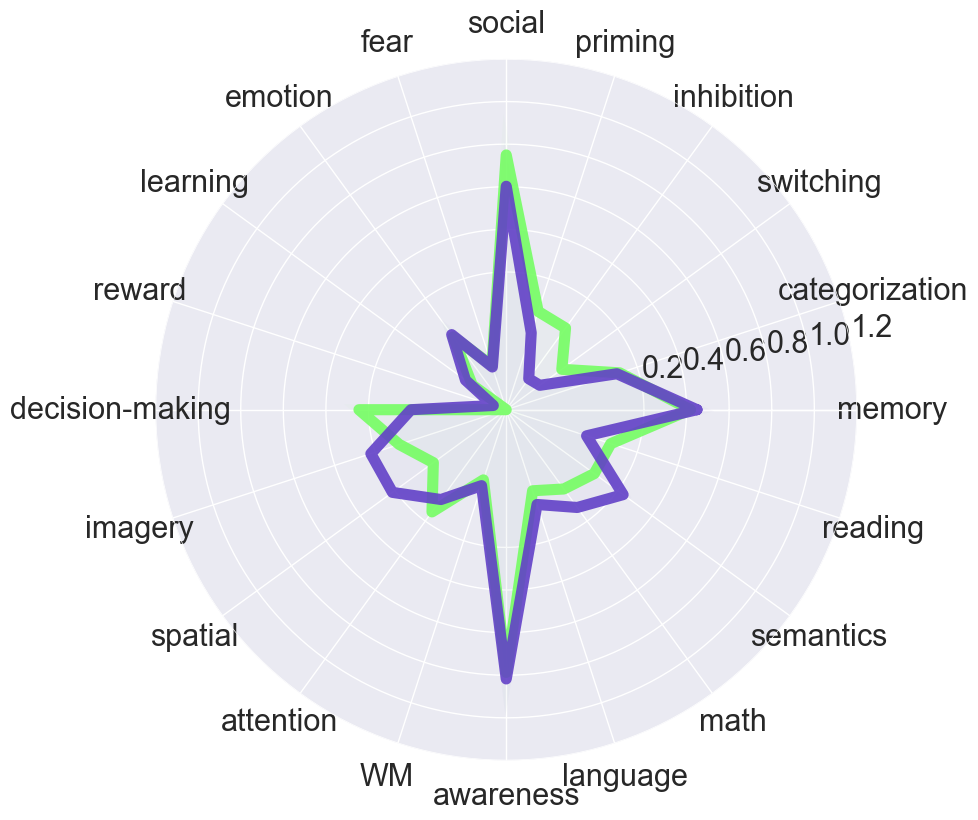

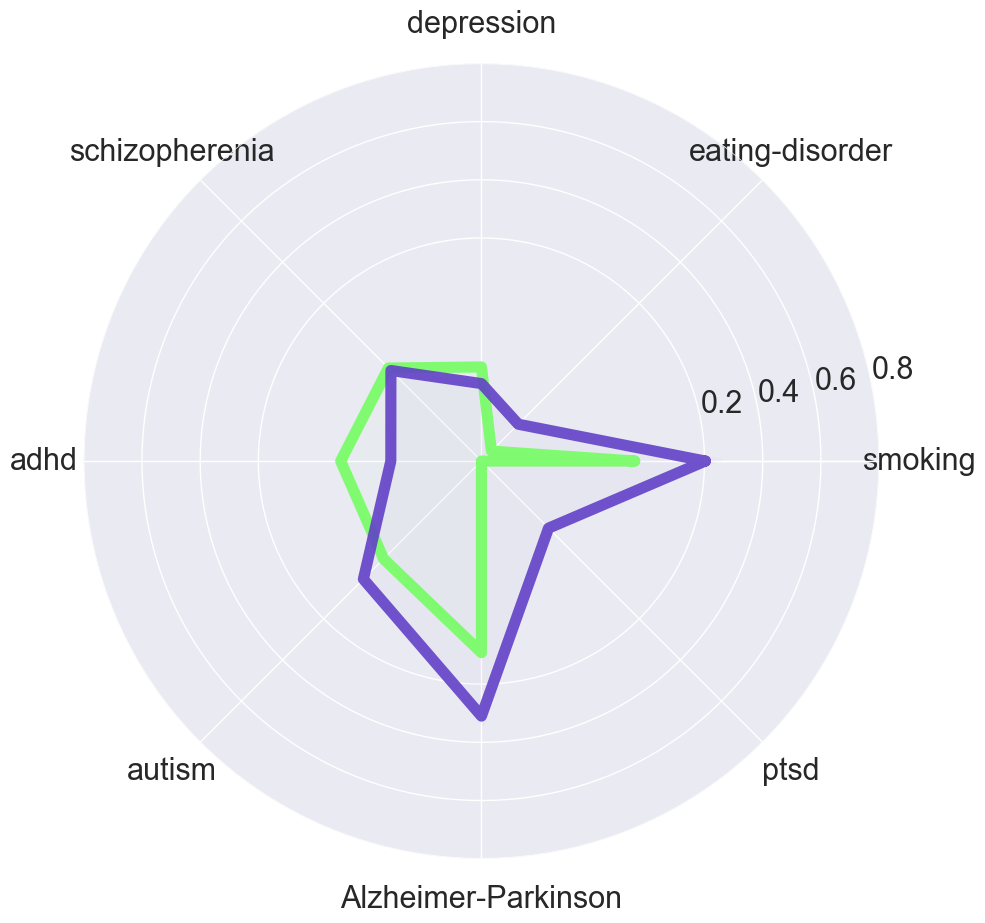

In [18]:
clf = RegionalClassifier(dataset, 'images/rTPJ/cluster_labels_k2.nii.gz', GaussianNB())
clf.classify(scoring=roc_auc_score)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

colors = ["lighter green","bluey purple"]
colors = sns.xkcd_palette(colors)
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)

a, b, cog =plot_clf_polar(formated_importances,labels = cognitive_topics, max_val=1.2,palette = colors,label_size=22)
a, b, dis = plot_clf_polar(formated_importances, labels = disease_topics, max_val=0.8,palette = colors,label_size=22)

cog.savefig('rTPJ_cog.svg')
dis.savefig('rTPJ_dis.svg')